### Titanic - Exploratory Data Analysis
In this project, I explored the Titanic: Machine Learning from Disaster dataset from Kaggle. The key steps I performed included:

Data Cleaning: Handled missing values (e.g., age and embarked), corrected data types, and cleaned categorical fields.

Summary Statistics: Generated group-wise survival insights — e.g., survival rates by gender, passenger class, and family size.

Visualizations: Created multiple plots using Matplotlib and Seaborn, including:

Bar plots for survival by gender, class, and embarkation point

Box plots of age and fare distributions

A correlation heatmap for numerical features

Insights: Found clear survival trends based on gender and class, where females and first-class passengers had higher chances of survival.

This EDA provided a solid foundation for future steps like model building or dashboarding.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
from ydata_profiling import ProfileReport
import seaborn as sns

In [18]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

In [23]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


In [24]:
df['Age']=df['Age'].astype(int)

In [26]:
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age               int32
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
profile = ProfileReport(df, title="Titanic Dataset Profiling Report", explorative=True)
profile.to_file("titanic_profile_report.html")


Summarize dataset:  72%|█████████████████████████▎         | 13/18 [00:00<00:00, 30.09it/s, Calculate auto correlation]C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 4 3 4 4 3 6 0 3 1 0 7 2 4 1 6 0 3 3 3 4 4 1 3 0 4 3 2 3 3 4 3 3 8 3 5 3
 2 2 1 4 3 3 0 2 3 3 3 3 2 0 2 6 3 8 3 2 3 0 1 2 4 5 0 3 3 3 2 2 3 3 1 2 3
 3 3 3 3 0 3 2 3 3 3 2 4 1 3 2 2 3 2 5 3 7 3 8 2 4 4 3 3 2 4 4 3 2 3 4 3 5
 1 2 2 2 2 8 3 2 0 2 3 3 3 6 1 3 2 3 5 4 2 5 3 3 2 2 4 1 2 3 2 2 2 2 2 3 1
 4 5 6 2 6 4 3 6 1 3 3 3 5 4 3 2 0 1 3 5 3 3 7 0 0 2 6 2 3 6 3 4 3 3 1 0 0
 3 3 5 4 4 3 2 2 0 5 7 3 5 3 2 3 3 4 5 2 0 3 3 1 4 2 4 2 3 3 3 3 5 3 3 1 3
 6 3 4 2 2 2 2 3 4 3 7 0 2 3 5 0 2 4 3 3 3 2 3 5 3 2 4 6 3 3 7 3 5 3 3 3 4
 6 3 0 6 4 3 4 1 3 7 4 3 3 5 4 3 7 5 3 0 4 8 3 1 2 3 4 3 2 5 2 3 2 4 2 2 3
 2 0 3 6 3 3 2 3 3 0 3 2 3 3 2 2 3 3 5 3 2 6 3 4 2 

In [30]:
# Title
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Family size and solo traveler
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Age and Fare bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])


In [31]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.345679,0.523008,0.381594,32.204208,1.904602,0.602694
std,257.353842,13.028212,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000


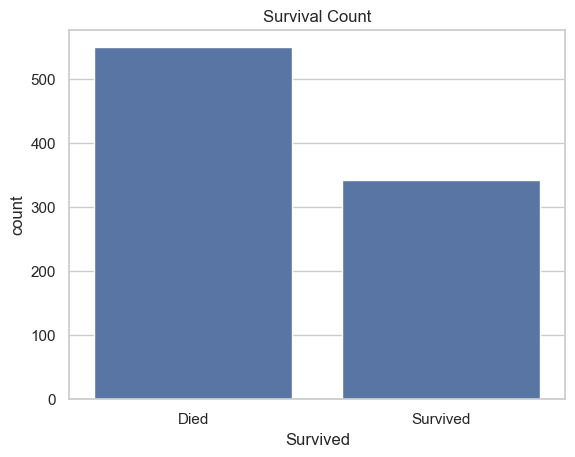

In [51]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()


In [36]:
df['Survived'] = df['Survived'].astype(int)

# Survival Rate by Gender
print("\n Survival Rate by Gender:")
print(df.groupby('Sex', observed=False)['Survived'].mean())

# Survival Rate by Passenger Class
print("\n Survival Rate by Passenger Class:")
print(df.groupby('Pclass', observed=False)['Survived'].mean())

# Survival Rate by Age Group
print("\n Survival Rate by Age Group:")
print(df.groupby('AgeGroup', observed=False)['Survived'].mean())

# Survival Rate by Title
print("\n Survival Rate by Title:")
print(df.groupby('Title', observed=False)['Survived'].mean().sort_values(ascending=False))

# Survival Rate by Family Size
print("\n Survival Rate by Family Size:")
print(df.groupby('FamilySize', observed=False)['Survived'].mean())

# Survival Rate by IsAlone
print("\n Survival Rate by IsAlone:")
print(df.groupby('IsAlone', observed=False)['Survived'].mean())

# Survival Rate by Fare Band
print("\n Survival Rate by Fare Band:")
print(df.groupby('FareBand', observed=False)['Survived'].mean())



 Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

 Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

 Survival Rate by Age Group:
AgeGroup
Child     0.532258
Teen      0.428571
Adult     0.365753
Senior    0.227273
Name: Survived, dtype: float64

 Survival Rate by Title:
Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Rare      0.347826
Mr        0.156673
Name: Survived, dtype: float64

 Survival Rate by Family Size:
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

 Survival Rate by IsAlone:
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

 Survival Rate by Fare Band:
FareBand
Low          0.197309
Medium       0.303571
High         0.454955
Very High    0.581081
Name: Survived, dtype: float64


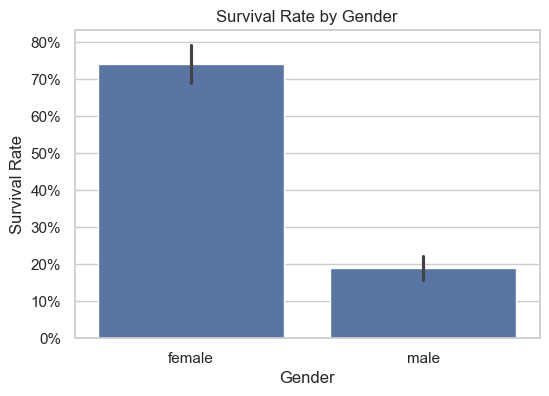

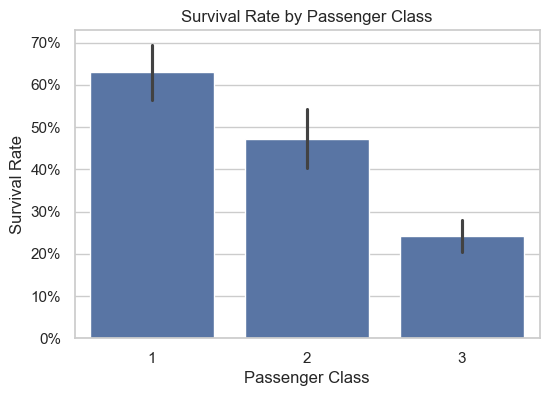

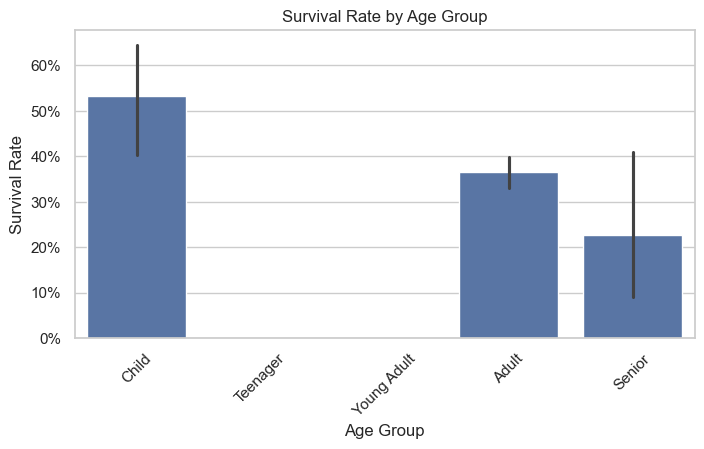

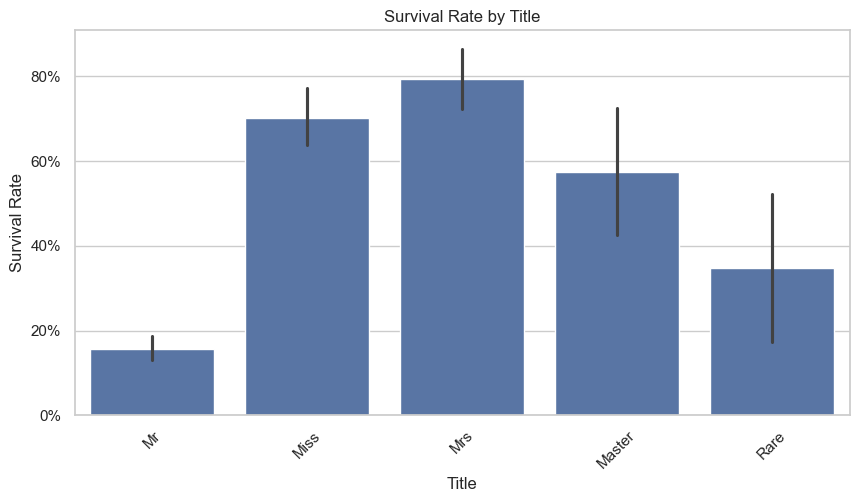

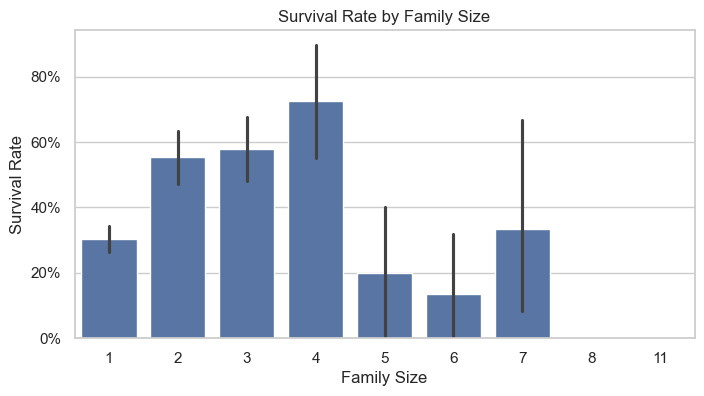

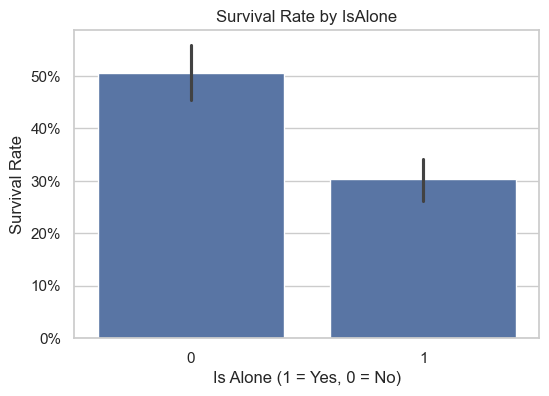

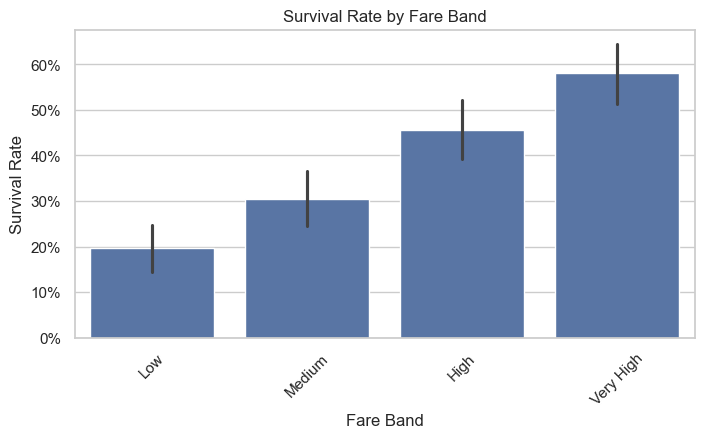

In [44]:
# 1. Survival by Gender
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

# 2. Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

# 3. Survival by Age Group
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='AgeGroup', y='Survived', order=['Child','Teenager','Young Adult','Adult','Senior'])
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

# 4. Survival by Title
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Title', y='Survived', order=df['Title'].value_counts().index)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

# 5. Survival by Family Size
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

# 6. Survival by IsAlone
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='IsAlone', y='Survived')
plt.title('Survival Rate by IsAlone')
plt.ylabel('Survival Rate')
plt.xlabel('Is Alone (1 = Yes, 0 = No)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

# 7. Survival by Fare Band
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='FareBand', y='Survived', order=df['FareBand'].cat.categories)
plt.title('Survival Rate by Fare Band')
plt.ylabel('Survival Rate')
plt.xlabel('Fare Band')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()


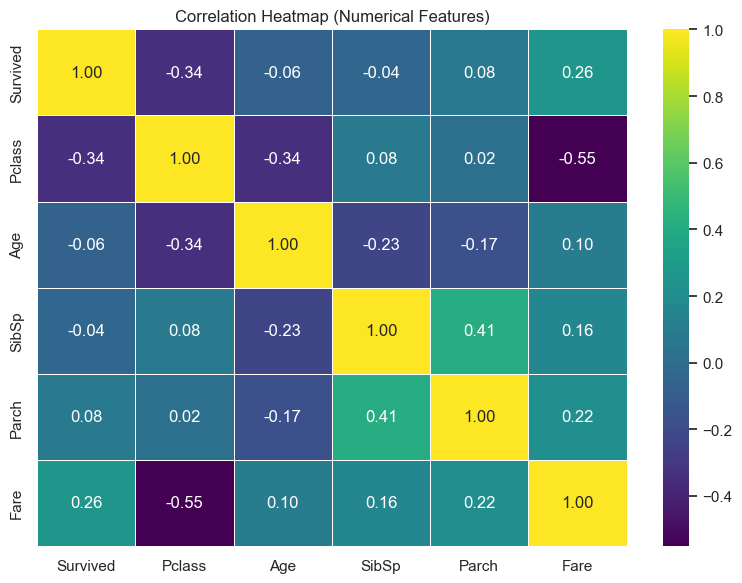

In [49]:
numerical_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
corr = numerical_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()

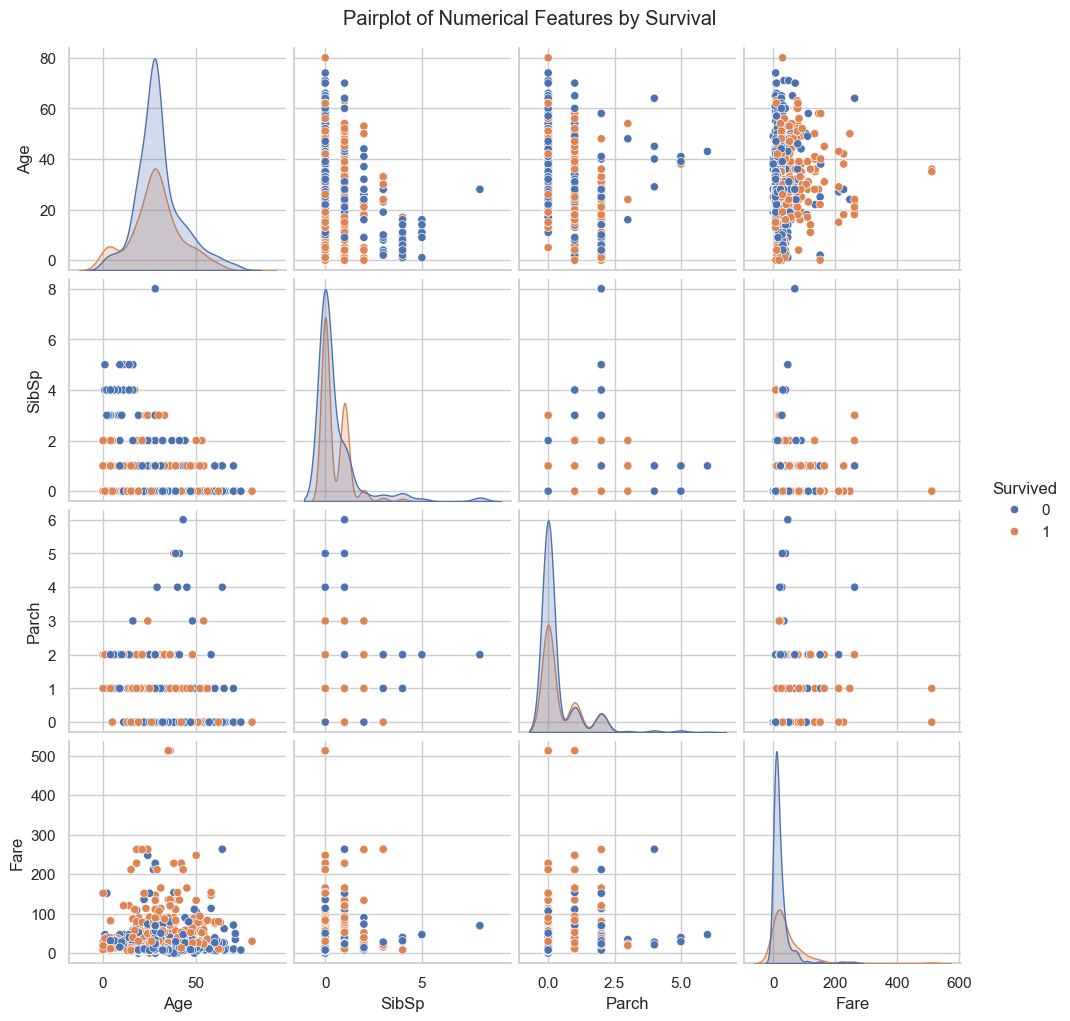

In [50]:
sns.pairplot(numerical_df, hue='Survived', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features by Survival", y=1.02)
plt.show()

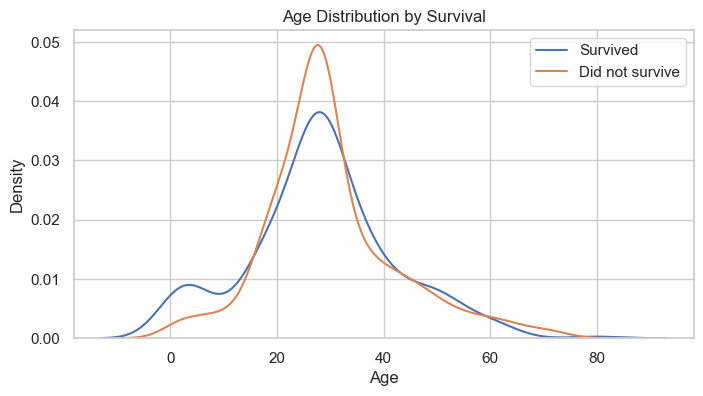

In [53]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df[df['Survived']==1], x='Age', label='Survived')
sns.kdeplot(data=df[df['Survived']==0], x='Age', label='Did not survive')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.legend()
plt.show()
